In [1]:
import sys         
sys.path.append('../scripts/')
from robot import *

In [2]:
class Particle:    ###particle_class###
    def __init__(self, init_pose):
        self.pose = init_pose

In [3]:
class Mcl:        ###Mcl_class###
    def __init__(self, init_pose, num):
        self.particles = [Particle(init_pose) for i in range(num)]

In [4]:
class EstimationAgent(Agent):  ###EstimationAgent2###
    def __init__(self, nu, omega, estimator): #引数を追加
        super().__init__(nu, omega)
        self.estimator = estimator
        
    def draw(self, ax, elems):
        elems.append(ax.text(0, 0, "hoge", fontsize=10))

<IPython.core.display.Javascript object>


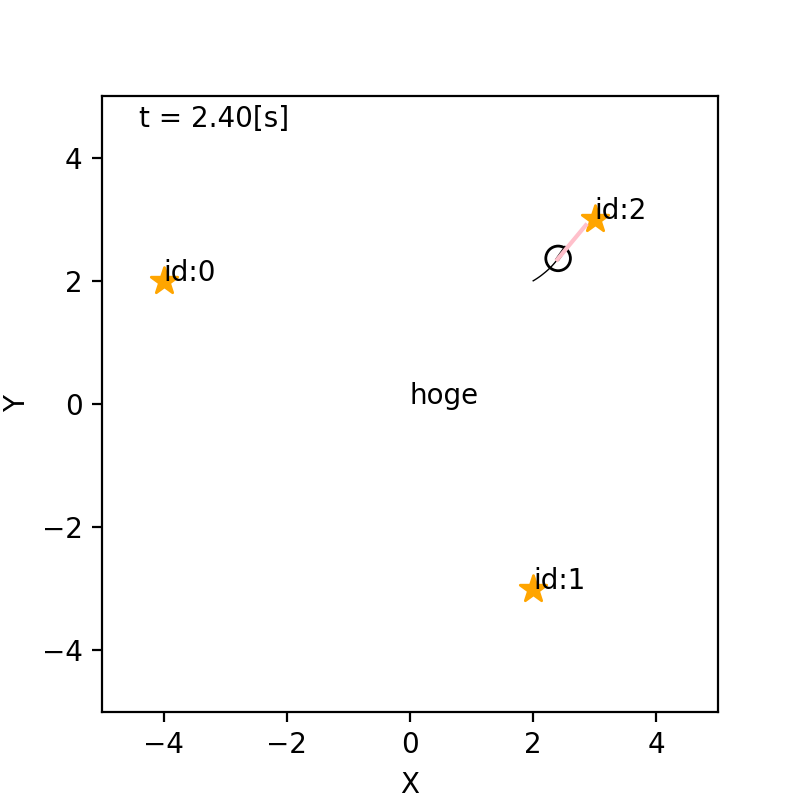

In [5]:
world = World(30, 0.1)   ###1--15行目をmcl2_12として1行掲載

### 地図を生成して3つランドマークを追加 ###
m = Map()
for ln in [(-4,2), (2,-3), (3,3)]: m.append_landmark(Landmark(*ln))
world.append(m)       

### ロボットを作る ###
initial_pose = np.array([2, 2, math.pi/6]).T
estimator = Mcl(initial_pose, 100)                                     #パーティクルファイルタを作る
circling = EstimationAgent(0.2, 10.0/180*math.pi, estimator)  #estimatorを渡す
r = Robot(initial_pose, sensor=Camera(m), agent=circling) 
world.append(r)

### アニメーション実行 ###
world.draw()